In [20]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [21]:
dataset_path = '../dataset'

In [22]:
print("="*60)
print("DATASET STRUCTURE ANALYSIS")
print("="*60)

# Get only directories, skip files
top_level_folders = sorted([d for d in os.listdir(dataset_path)
                            if os.path.isdir(os.path.join(dataset_path, d))])
print(f"Top-level folders found: {len(top_level_folders)}")
for folder in top_level_folders:
    print(f"  - {folder}")

DATASET STRUCTURE ANALYSIS
Top-level folders found: 11
  - AnnualCrop
  - Forest
  - HerbaceousVegetation
  - Highway
  - Industrial
  - Pasture
  - PermanentCrop
  - Residential
  - River
  - SeaLake
  - allBands


In [23]:
# analyze each folder structure
all_results = {}
folders_to_analyze = top_level_folders
for parent_folder in folders_to_analyze:
    parent_path = os.path.join(dataset_path, parent_folder)

    print("\n" + "="*60)
    print(f"ANALYZING: {parent_folder}")
    print("="*60)

    # Check if this folder contains class subfolders or images directly
    contents = os.listdir(parent_path)
    subfolders = [d for d in contents if os.path.isdir(os.path.join(parent_path, d))]
    image_files = [f for f in contents if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]

    if len(subfolders) > 0:
        # This folder contains class subfolders
        print(f"\n✓ Contains {len(subfolders)} class folders")
        classes = sorted(subfolders)

        # Count images in each class
        class_distribution = {}
        for cls in classes:
            cls_path = os.path.join(parent_path, cls)
            images = [f for f in os.listdir(cls_path)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]
            class_distribution[cls] = len(images)

        all_results[parent_folder] = {
            'type': 'class_folder',
            'classes': classes,
            'distribution': class_distribution
        }

    elif len(image_files) > 0:
        # This folder contains images directly
        print(f"\n✓ Contains {len(image_files)} images directly")
        all_results[parent_folder] = {
            'type': 'image_folder',
            'num_images': len(image_files)
        }
    else:
        print(f" Empty or unknown structure")
        all_results[parent_folder] = {
            'type': 'unknown'
        }


ANALYZING: AnnualCrop

✓ Contains 3000 images directly

ANALYZING: Forest

✓ Contains 3000 images directly

ANALYZING: HerbaceousVegetation

✓ Contains 3000 images directly

ANALYZING: Highway

✓ Contains 2500 images directly

ANALYZING: Industrial

✓ Contains 2500 images directly

ANALYZING: Pasture

✓ Contains 2000 images directly

ANALYZING: PermanentCrop

✓ Contains 2500 images directly

ANALYZING: Residential

✓ Contains 3000 images directly

ANALYZING: River

✓ Contains 2500 images directly

ANALYZING: SeaLake

✓ Contains 3000 images directly

ANALYZING: allBands

✓ Contains 10 class folders


In [24]:
print("\n" + "="*60)
print("DATASET STRUCTURE SUMMARY")
print("="*60)

main_dataset_folder = None
folder_scores = {}
for folder, info in all_results.items():
    if info['type'] == 'class_folder':
        score = 0
        # Favor standard names
        if any(name in folder.lower() for name in ['train', 'training']):
            score += 1000

        # Add number of images (with safety checks)
        if 'class_counts' in info:
            score += sum(info['class_counts'].values())
        elif 'classes' in info:
            # Fallback: use number of classes if counts not available
            score += len(info['classes']) * 100  # Weight by 100 per class

        folder_scores[folder] = score

main_dataset_folder = max(folder_scores, key=folder_scores.get) if folder_scores else None

# Set the main dataset path
if main_dataset_folder:
    print(f"\n>>> Using '{main_dataset_folder}' as main dataset folder")
    dataset_analysis_path = os.path.join(dataset_path, main_dataset_folder)
else:
    print("  No clear class structure found. Using first folder.")
    main_dataset_folder = folders_to_analyze[0]
    dataset_analysis_path = os.path.join(dataset_path, main_dataset_folder)


DATASET STRUCTURE SUMMARY

>>> Using 'allBands' as main dataset folder


In [25]:
print("\n" + "="*60)
print("PRE-CHECKING THE IMBALANCE")
print("="*60)
dataset_analysis_path = '../dataset/allBands'
classes = sorted([d for d in os.listdir(dataset_analysis_path)
                  if os.path.isdir(os.path.join(dataset_analysis_path, d))])

print(f"Total classes: {len(classes)}")
for cls in classes:
    print(f"  {cls}")

class_distribution = {}
for cls in classes:
    cls_path = os.path.join(dataset_analysis_path, cls)
    images = [f for f in os.listdir(cls_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]
    class_distribution[cls] = len(images)
    print(f"{cls:25s}: {len(images):4d} images")



# Statistics
total_images = sum(class_distribution.values())
min_images = min(class_distribution.values())
max_images = max(class_distribution.values())
avg_images = total_images / len(classes)

print(f"\n{'Total images:':30s} {total_images:5d}")
print(f"{'Average per class:':30s} {avg_images:5.1f}")
print(f"{'Min images:':30s} {min_images:5d}")
print(f"{'Max images:':30s} {max_images:5d}")


PRE-CHECKING THE IMBALANCE
Total classes: 10
  AnnualCrop
  Forest
  HerbaceousVegetation
  Highway
  Industrial
  Pasture
  PermanentCrop
  Residential
  River
  SeaLake
AnnualCrop               : 3000 images
Forest                   : 3000 images
HerbaceousVegetation     : 3000 images
Highway                  : 2500 images
Industrial               : 2500 images
Pasture                  : 2000 images
PermanentCrop            : 2500 images
Residential              : 3000 images
River                    : 2500 images
SeaLake                  : 3597 images

Total images:                  27597
Average per class:             2759.7
Min images:                     2000
Max images:                     3597



CLASS BALANCE ANALYSIS

Balance ratio (min/max): 0.556
Dataset is IMBALANCED

Least represented: Pasture (2000 images)
Most represented:  SeaLake (3597 images)

📊 Saved: class_distribution.png


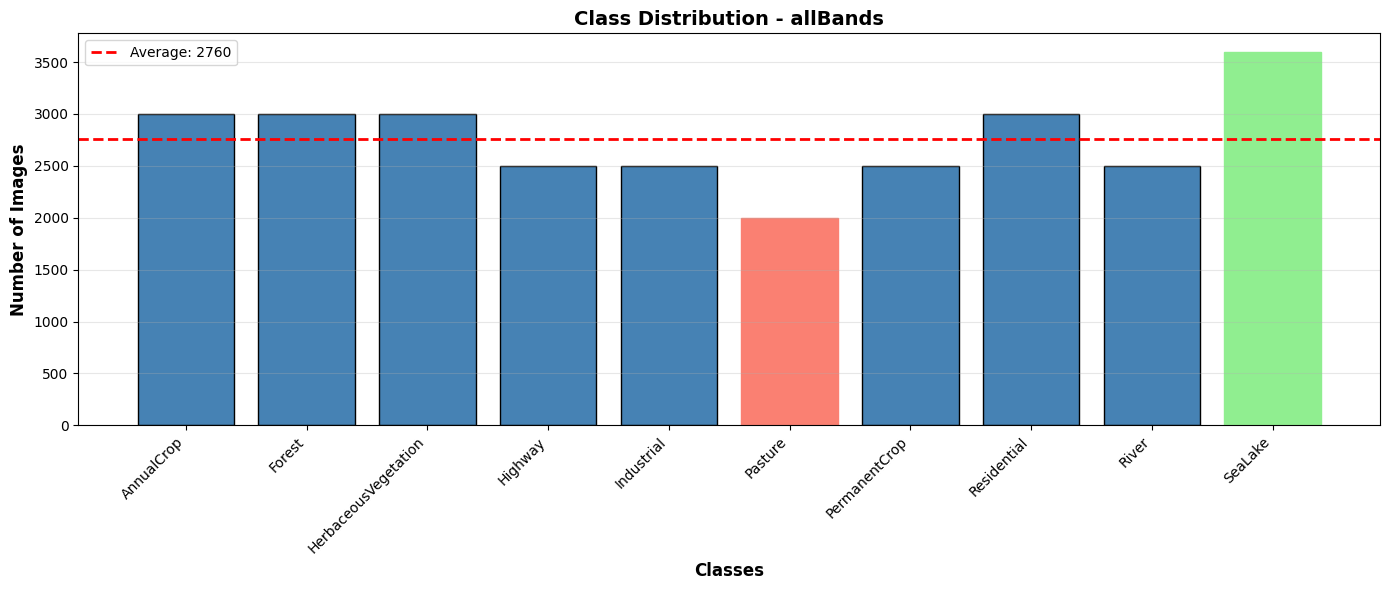

In [26]:
print("\n" + "="*60)
print("CLASS BALANCE ANALYSIS")
print("="*60)

balance_ratio = min_images / max_images
print(f"\nBalance ratio (min/max): {balance_ratio:.3f}")

if balance_ratio >= 0.9:
    print("Dataset is WELL BALANCED")
elif balance_ratio >= 0.7:
    print(" Dataset is MODERATELY BALANCED")
else:
    print("Dataset is IMBALANCED")
    sorted_classes = sorted(class_distribution.items(), key=lambda x: x[1])
    print(f"\nLeast represented: {sorted_classes[0][0]} ({sorted_classes[0][1]} images)")
    print(f"Most represented:  {sorted_classes[-1][0]} ({sorted_classes[-1][1]} images)")

# Visualize
plt.figure(figsize=(14, 6))
bars = plt.bar(class_distribution.keys(), class_distribution.values(), color='steelblue', edgecolor='black')
plt.axhline(y=avg_images, color='r', linestyle='--', linewidth=2, label=f'Average: {avg_images:.0f}')

# Color bars based on deviation from average
for i, bar in enumerate(bars):
    if class_distribution[classes[i]] < avg_images * 0.8:
        bar.set_color('salmon')
    elif class_distribution[classes[i]] > avg_images * 1.2:
        bar.set_color('lightgreen')

plt.xlabel('Classes', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.title('Class Distribution - allBands', fontsize=14, fontweight='bold')  # Changed here
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300)
print("\n📊 Saved: class_distribution.png")
plt.show()

In [27]:
print("\n" + "="*60)
print("IMAGE PROPERTIES ANALYSIS")
print("="*60)

import rasterio

image_sizes = []
image_modes = []
aspect_ratios = []
file_formats = []

print("\nSampling images from each class...")

for cls in classes:
    cls_path = os.path.join(dataset_analysis_path, cls)
    images = [f for f in os.listdir(cls_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]

    # Sample images
    sample_size = min(15, len(images))
    sampled_images = np.random.choice(images, sample_size, replace=False) if len(images) > 0 else []

    for img_name in sampled_images:
        img_path = os.path.join(cls_path, img_name)
        try:
            if img_path.lower().endswith(('.tif', '.tiff')):
                # Use rasterio for multi-band TIFF
                with rasterio.open(img_path) as src:
                    width, height = src.width, src.height
                    image_sizes.append((width, height))
                    image_modes.append(f'{src.count}-band')  # e.g., "13-band"
                    aspect_ratios.append(width / height)
                    file_formats.append('TIFF')
            else:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_sizes.append((width, height))
                    image_modes.append(img.mode)
                    aspect_ratios.append(width / height)
                    file_formats.append(img.format)
        except Exception as e:
            print(f" Error reading {img_path}: {e}")

print(f"\nTotal images analyzed: {len(image_sizes)}")

# Check if any images were loaded
if len(image_sizes) == 0:
    print("  No images found! Check folder structure.")
else:
    # Dimensions
    unique_sizes = list(set(image_sizes))
    size_counts = Counter(image_sizes)

    print(f"\nDimensions:")
    print(f"  Unique sizes found: {len(unique_sizes)}")

    if len(unique_sizes) == 1:
        print(f"   All images: {unique_sizes[0][0]}×{unique_sizes[0][1]} pixels")
    else:
        widths = [s[0] for s in image_sizes]
        heights = [s[1] for s in image_sizes]

        print(f" Varying dimensions:")
        print(f"    Width  → Min: {min(widths):4d} | Max: {max(widths):4d} | Avg: {np.mean(widths):.1f}")
        print(f"    Height → Min: {min(heights):4d} | Max: {max(heights):4d} | Avg: {np.mean(heights):.1f}")

        print(f"\n  Most common sizes:")
        for size, count in size_counts.most_common(3):
            pct = (count / len(image_sizes)) * 100
            print(f"    {size[0]:4d}×{size[1]:4d}: {count:3d} images ({pct:.1f}%)")

    # Aspect ratios
    print(f"\nAspect Ratios:")
    print(f"  Min: {min(aspect_ratios):.3f} | Max: {max(aspect_ratios):.3f} | Avg: {np.mean(aspect_ratios):.3f}")

    # Color modes
    mode_counts = Counter(image_modes)
    print(f"\nColor Modes:")
    mode_names = {'RGB': 'RGB (Color)', 'L': 'Grayscale', 'RGBA': 'RGB+Alpha', 'P': 'Palette'}
    for mode, count in mode_counts.most_common():
        pct = (count / len(image_modes)) * 100
        print(f"  {mode_names.get(mode, mode):20s}: {count:3d} ({pct:.1f}%)")

    if len(mode_counts) == 1 and 'RGB' in mode_counts:
        print("   All images are RGB")
    elif len(mode_counts) > 1:
        print(" Mixed modes - conversion needed")

    # File formats
    format_counts = Counter(file_formats)
    print(f"\nFile Formats:")
    for fmt, count in format_counts.most_common():
        pct = (count / len(file_formats)) * 100
        print(f"  {fmt:10s}: {count:3d} ({pct:.1f}%)")


IMAGE PROPERTIES ANALYSIS

Sampling images from each class...

Total images analyzed: 150

Dimensions:
  Unique sizes found: 1
   All images: 64×64 pixels

Aspect Ratios:
  Min: 1.000 | Max: 1.000 | Avg: 1.000

Color Modes:
  13-band             : 150 (100.0%)

File Formats:
  TIFF      : 150 (100.0%)



GENERATING VISUAL SAMPLES
📊 Saved: sample_images.png


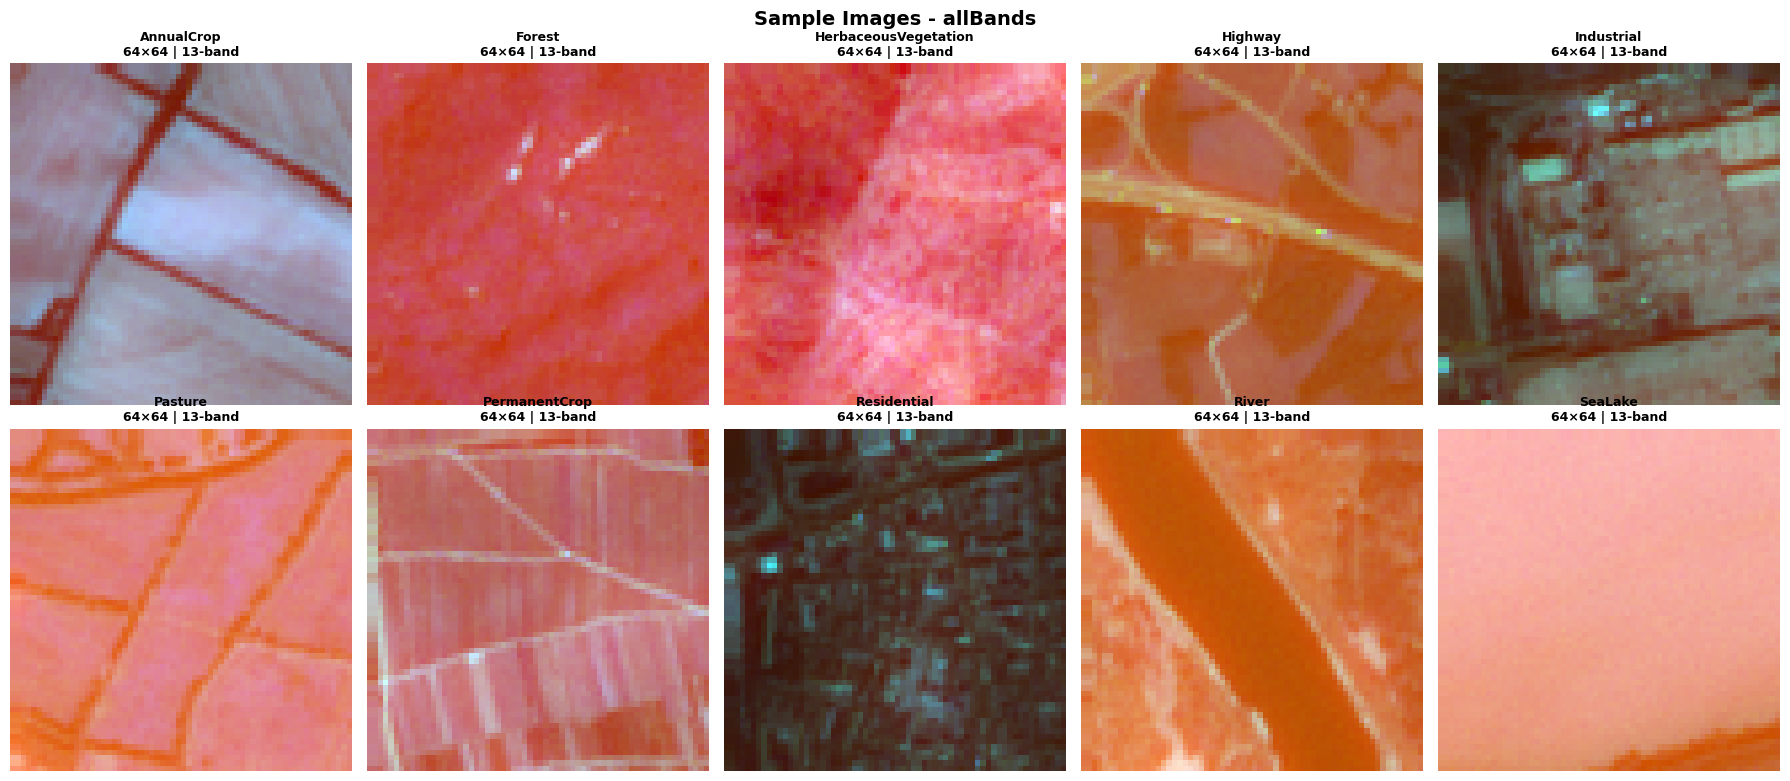

In [28]:
# ============================================
# VISUAL SAMPLES
# ============================================
print("\n" + "="*60)
print("GENERATING VISUAL SAMPLES")
print("="*60)

n_samples = min(10, len(classes))
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for idx in range(10):
    if idx < len(classes):
        cls = classes[idx]
        cls_path = os.path.join(dataset_analysis_path, cls)
        images = [f for f in os.listdir(cls_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff'))]

        if len(images) > 0:
            sample_img = np.random.choice(images)
            img_path = os.path.join(cls_path, sample_img)

            try:
                if img_path.lower().endswith(('.tif', '.tiff')):
                    # Handle multi-band TIFF - display first 3 bands as RGB
                    with rasterio.open(img_path) as src:
                        # Read first 3 bands and normalize
                        rgb = src.read([1, 2, 3])  # Shape: (3, height, width)
                        rgb = np.transpose(rgb, (1, 2, 0))  # Shape: (height, width, 3)
                        # Normalize to 0-1 range for display
                        rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())
                        axes[idx].imshow(rgb)
                        axes[idx].set_title(f"{cls}\n{src.width}×{src.height} | {src.count}-band",
                                           fontsize=9, fontweight='bold')
                        axes[idx].axis('off')
                else:
                    with Image.open(img_path) as img:
                        axes[idx].imshow(img)
                        axes[idx].set_title(f"{cls}\n{img.size[0]}×{img.size[1]} | {img.mode}",
                                           fontsize=9, fontweight='bold')
                        axes[idx].axis('off')
            except Exception as e:
                axes[idx].text(0.5, 0.5, f"Error\n{cls}", ha='center', va='center')
                axes[idx].axis('off')
    else:
        axes[idx].axis('off')

plt.suptitle('Sample Images - allBands', fontsize=14, fontweight='bold')  # Fixed variable name
plt.tight_layout()
plt.savefig('sample_images.png', dpi=300, bbox_inches='tight')
print("📊 Saved: sample_images.png")
plt.show()

1. BAND STATISTICS & VISUALIZATION

Analyzing sample image: SeaLake/SeaLake_338.tif

Image properties:
  Dimensions: 64 × 64
  Number of bands: 13
  Data type: uint16

Band Statistics:
Band   Min        Max        Mean       Std       
--------------------------------------------------
1      1266.00    1327.00    1276.37    7.68      
2      926.00     1078.00    958.20     15.74     
3      782.00     990.00     880.73     16.74     
4      522.00     783.00     588.85     14.44     
5      638.00     1017.00    674.00     59.82     
6      421.00     2933.00    561.02     357.38    
7      430.00     3924.00    605.64     470.47    
8      335.00     4071.00    510.01     535.80    
9      80.00      494.00     126.12     87.96     
10     5.00       9.00       6.65       0.81      
11     62.00      1682.00    167.42     266.04    
12     24.00      651.00     75.56      104.81    
13     316.00     4294.00    517.50     547.29    

Generating band combination visualizations...
📊 S

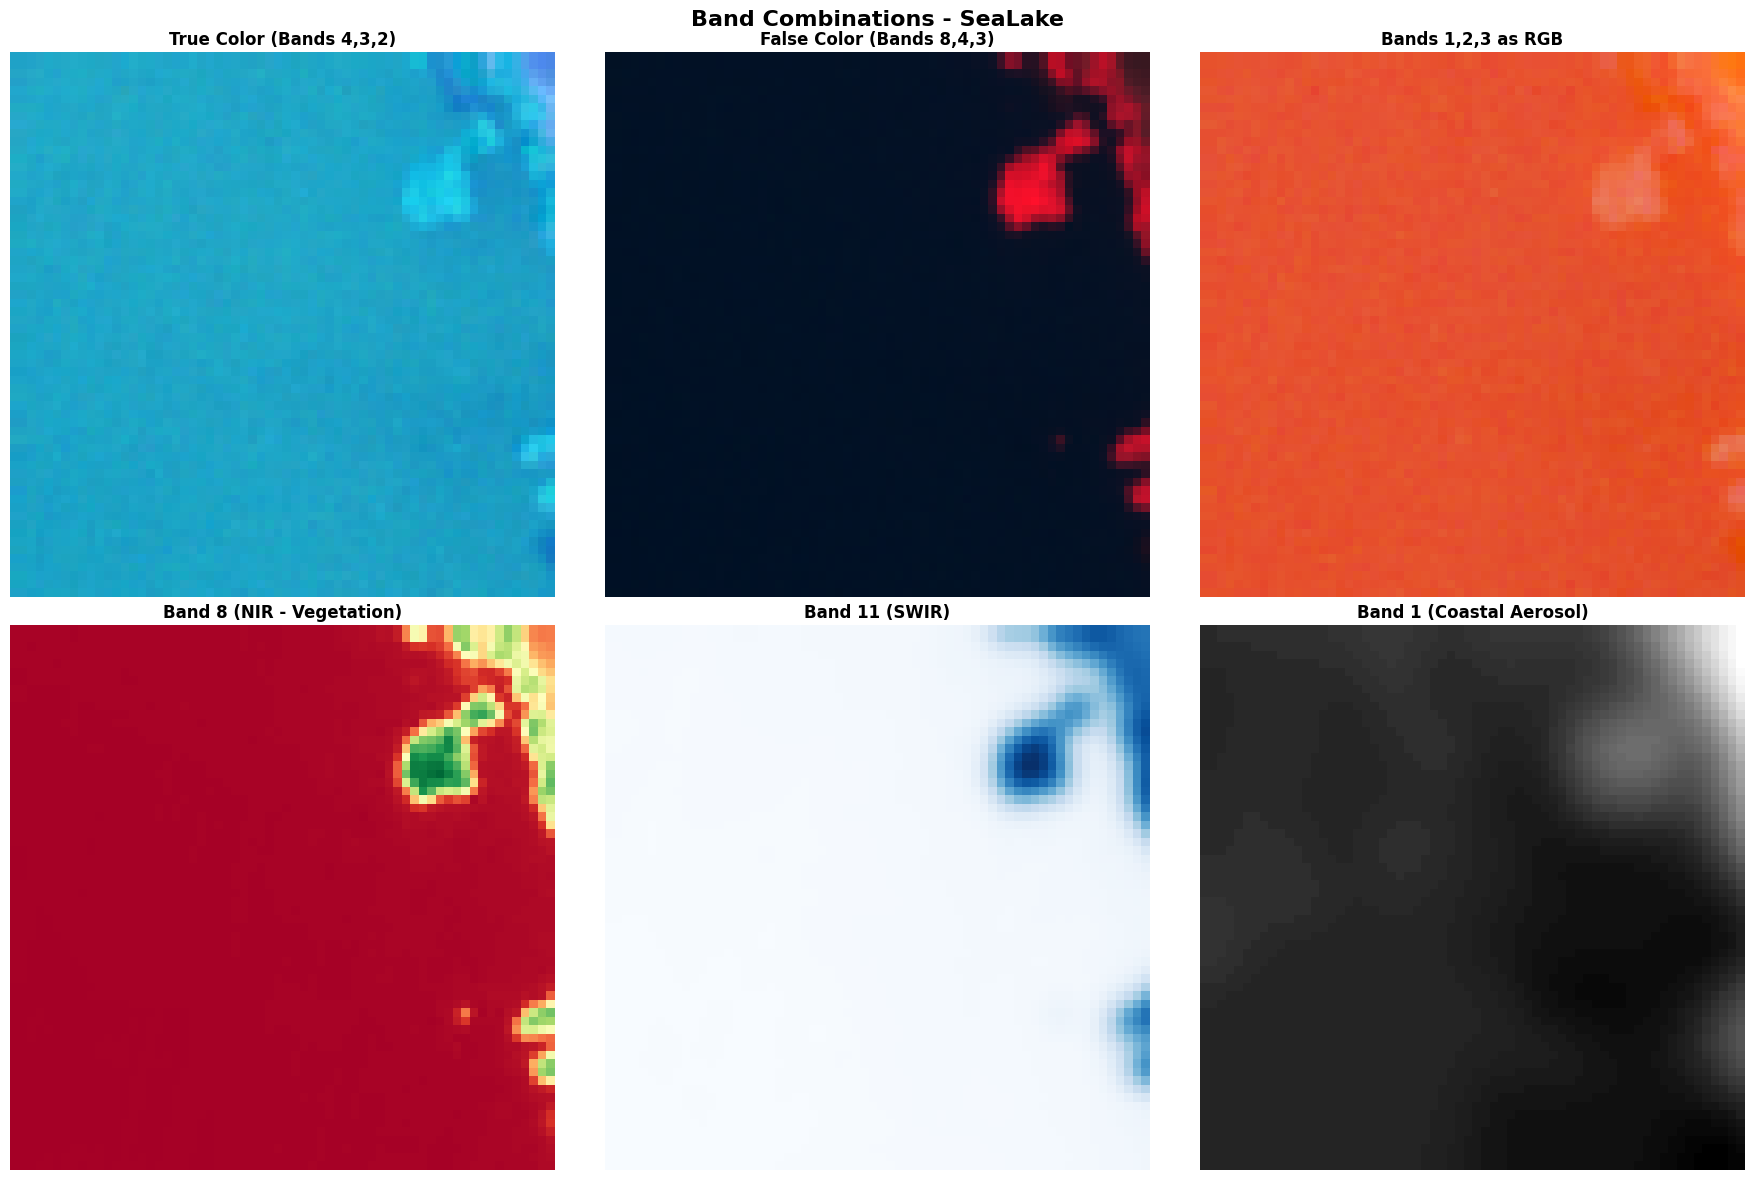


Generating individual band visualizations...
📊 Saved: all_bands.png


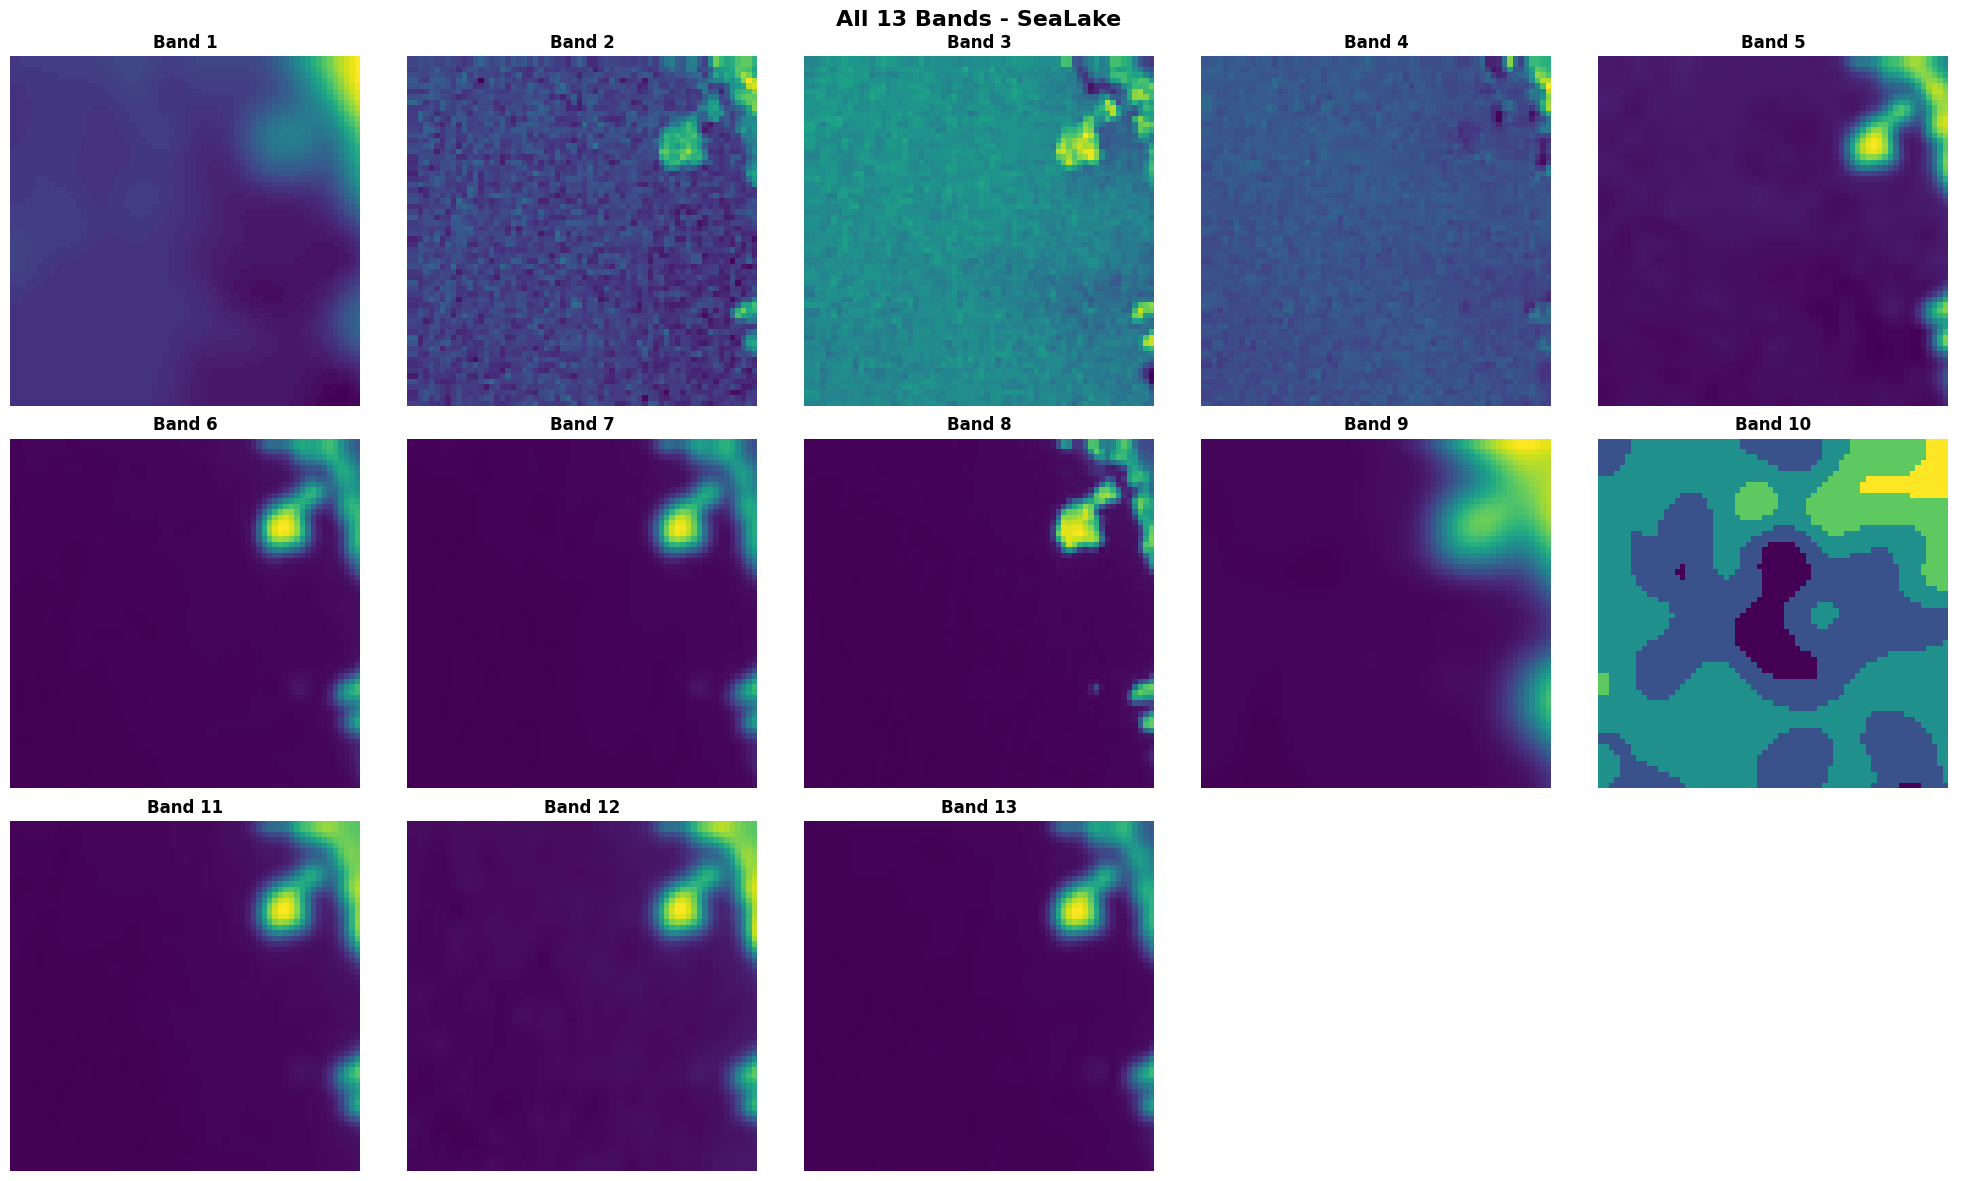


 Band analysis complete!


In [29]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import random

print("="*60)
print("1. BAND STATISTICS & VISUALIZATION")
print("="*60)

# Get a random sample image to analyze
sample_class = random.choice(classes)
sample_class_path = os.path.join(dataset_analysis_path, sample_class)
sample_images = [f for f in os.listdir(sample_class_path) if f.endswith('.tif')]
sample_image = random.choice(sample_images)
sample_image_path = os.path.join(sample_class_path, sample_image)

print(f"\nAnalyzing sample image: {sample_class}/{sample_image}")

# Analyze all bands
with rasterio.open(sample_image_path) as src:
    print(f"\nImage properties:")
    print(f"  Dimensions: {src.width} × {src.height}")
    print(f"  Number of bands: {src.count}")
    print(f"  Data type: {src.dtypes[0]}")

    print(f"\nBand Statistics:")
    print(f"{'Band':<6} {'Min':<10} {'Max':<10} {'Mean':<10} {'Std':<10}")
    print("-" * 50)

    band_stats = []
    for i in range(1, src.count + 1):
        band = src.read(i)
        stats = {
            'band': i,
            'min': band.min(),
            'max': band.max(),
            'mean': band.mean(),
            'std': band.std()
        }
        band_stats.append(stats)
        print(f"{i:<6} {stats['min']:<10.2f} {stats['max']:<10.2f} {stats['mean']:<10.2f} {stats['std']:<10.2f}")

# Visualize different band combinations
print("\nGenerating band combination visualizations...")

with rasterio.open(sample_image_path) as src:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # True Color RGB (assuming bands 4,3,2 are RGB)
    try:
        rgb = np.dstack([src.read(4), src.read(3), src.read(2)])
        rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())
        axes[0, 0].imshow(rgb_norm)
        axes[0, 0].set_title("True Color (Bands 4,3,2)", fontweight='bold')
        axes[0, 0].axis('off')
    except:
        axes[0, 0].text(0.5, 0.5, 'N/A', ha='center', va='center')
        axes[0, 0].axis('off')

    # False Color (NIR, Red, Green) - useful for vegetation
    try:
        false_color = np.dstack([src.read(8), src.read(4), src.read(3)])
        false_color_norm = (false_color - false_color.min()) / (false_color.max() - false_color.min())
        axes[0, 1].imshow(false_color_norm)
        axes[0, 1].set_title("False Color (Bands 8,4,3)", fontweight='bold')
        axes[0, 1].axis('off')
    except:
        axes[0, 1].text(0.5, 0.5, 'N/A', ha='center', va='center')
        axes[0, 1].axis('off')

    # First 3 bands as RGB
    rgb_123 = np.dstack([src.read(1), src.read(2), src.read(3)])
    rgb_123_norm = (rgb_123 - rgb_123.min()) / (rgb_123.max() - rgb_123.min())
    axes[0, 2].imshow(rgb_123_norm)
    axes[0, 2].set_title("Bands 1,2,3 as RGB", fontweight='bold')
    axes[0, 2].axis('off')

    # Individual important bands
    band_8 = src.read(8)
    band_8_norm = (band_8 - band_8.min()) / (band_8.max() - band_8.min())
    axes[1, 0].imshow(band_8_norm, cmap='RdYlGn')
    axes[1, 0].set_title("Band 8 (NIR - Vegetation)", fontweight='bold')
    axes[1, 0].axis('off')

    band_11 = src.read(11)
    band_11_norm = (band_11 - band_11.min()) / (band_11.max() - band_11.min())
    axes[1, 1].imshow(band_11_norm, cmap='Blues')
    axes[1, 1].set_title("Band 11 (SWIR)", fontweight='bold')
    axes[1, 1].axis('off')

    band_1 = src.read(1)
    band_1_norm = (band_1 - band_1.min()) / (band_1.max() - band_1.min())
    axes[1, 2].imshow(band_1_norm, cmap='gray')
    axes[1, 2].set_title("Band 1 (Coastal Aerosol)", fontweight='bold')
    axes[1, 2].axis('off')

plt.suptitle(f"Band Combinations - {sample_class}", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('band_combinations.png', dpi=300, bbox_inches='tight')
print("📊 Saved: band_combinations.png")
plt.show()

# Visualize all 13 bands individually
print("\nGenerating individual band visualizations...")

with rasterio.open(sample_image_path) as src:
    fig, axes = plt.subplots(3, 5, figsize=(20, 12))
    axes = axes.ravel()

    for i in range(13):
        band = src.read(i + 1)
        band_norm = (band - band.min()) / (band.max() - band.min())
        axes[i].imshow(band_norm, cmap='viridis')
        axes[i].set_title(f"Band {i+1}", fontweight='bold')
        axes[i].axis('off')

    # Hide extra subplots
    for i in range(13, 15):
        axes[i].axis('off')

plt.suptitle(f"All 13 Bands - {sample_class}", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('all_bands.png', dpi=300, bbox_inches='tight')
print("📊 Saved: all_bands.png")
plt.show()

print("\n Band analysis complete!")


2. CLASS-SPECIFIC VISUALIZATION

Generating multiple samples per class to see intra-class variability...

📊 Saved: class_variability.png


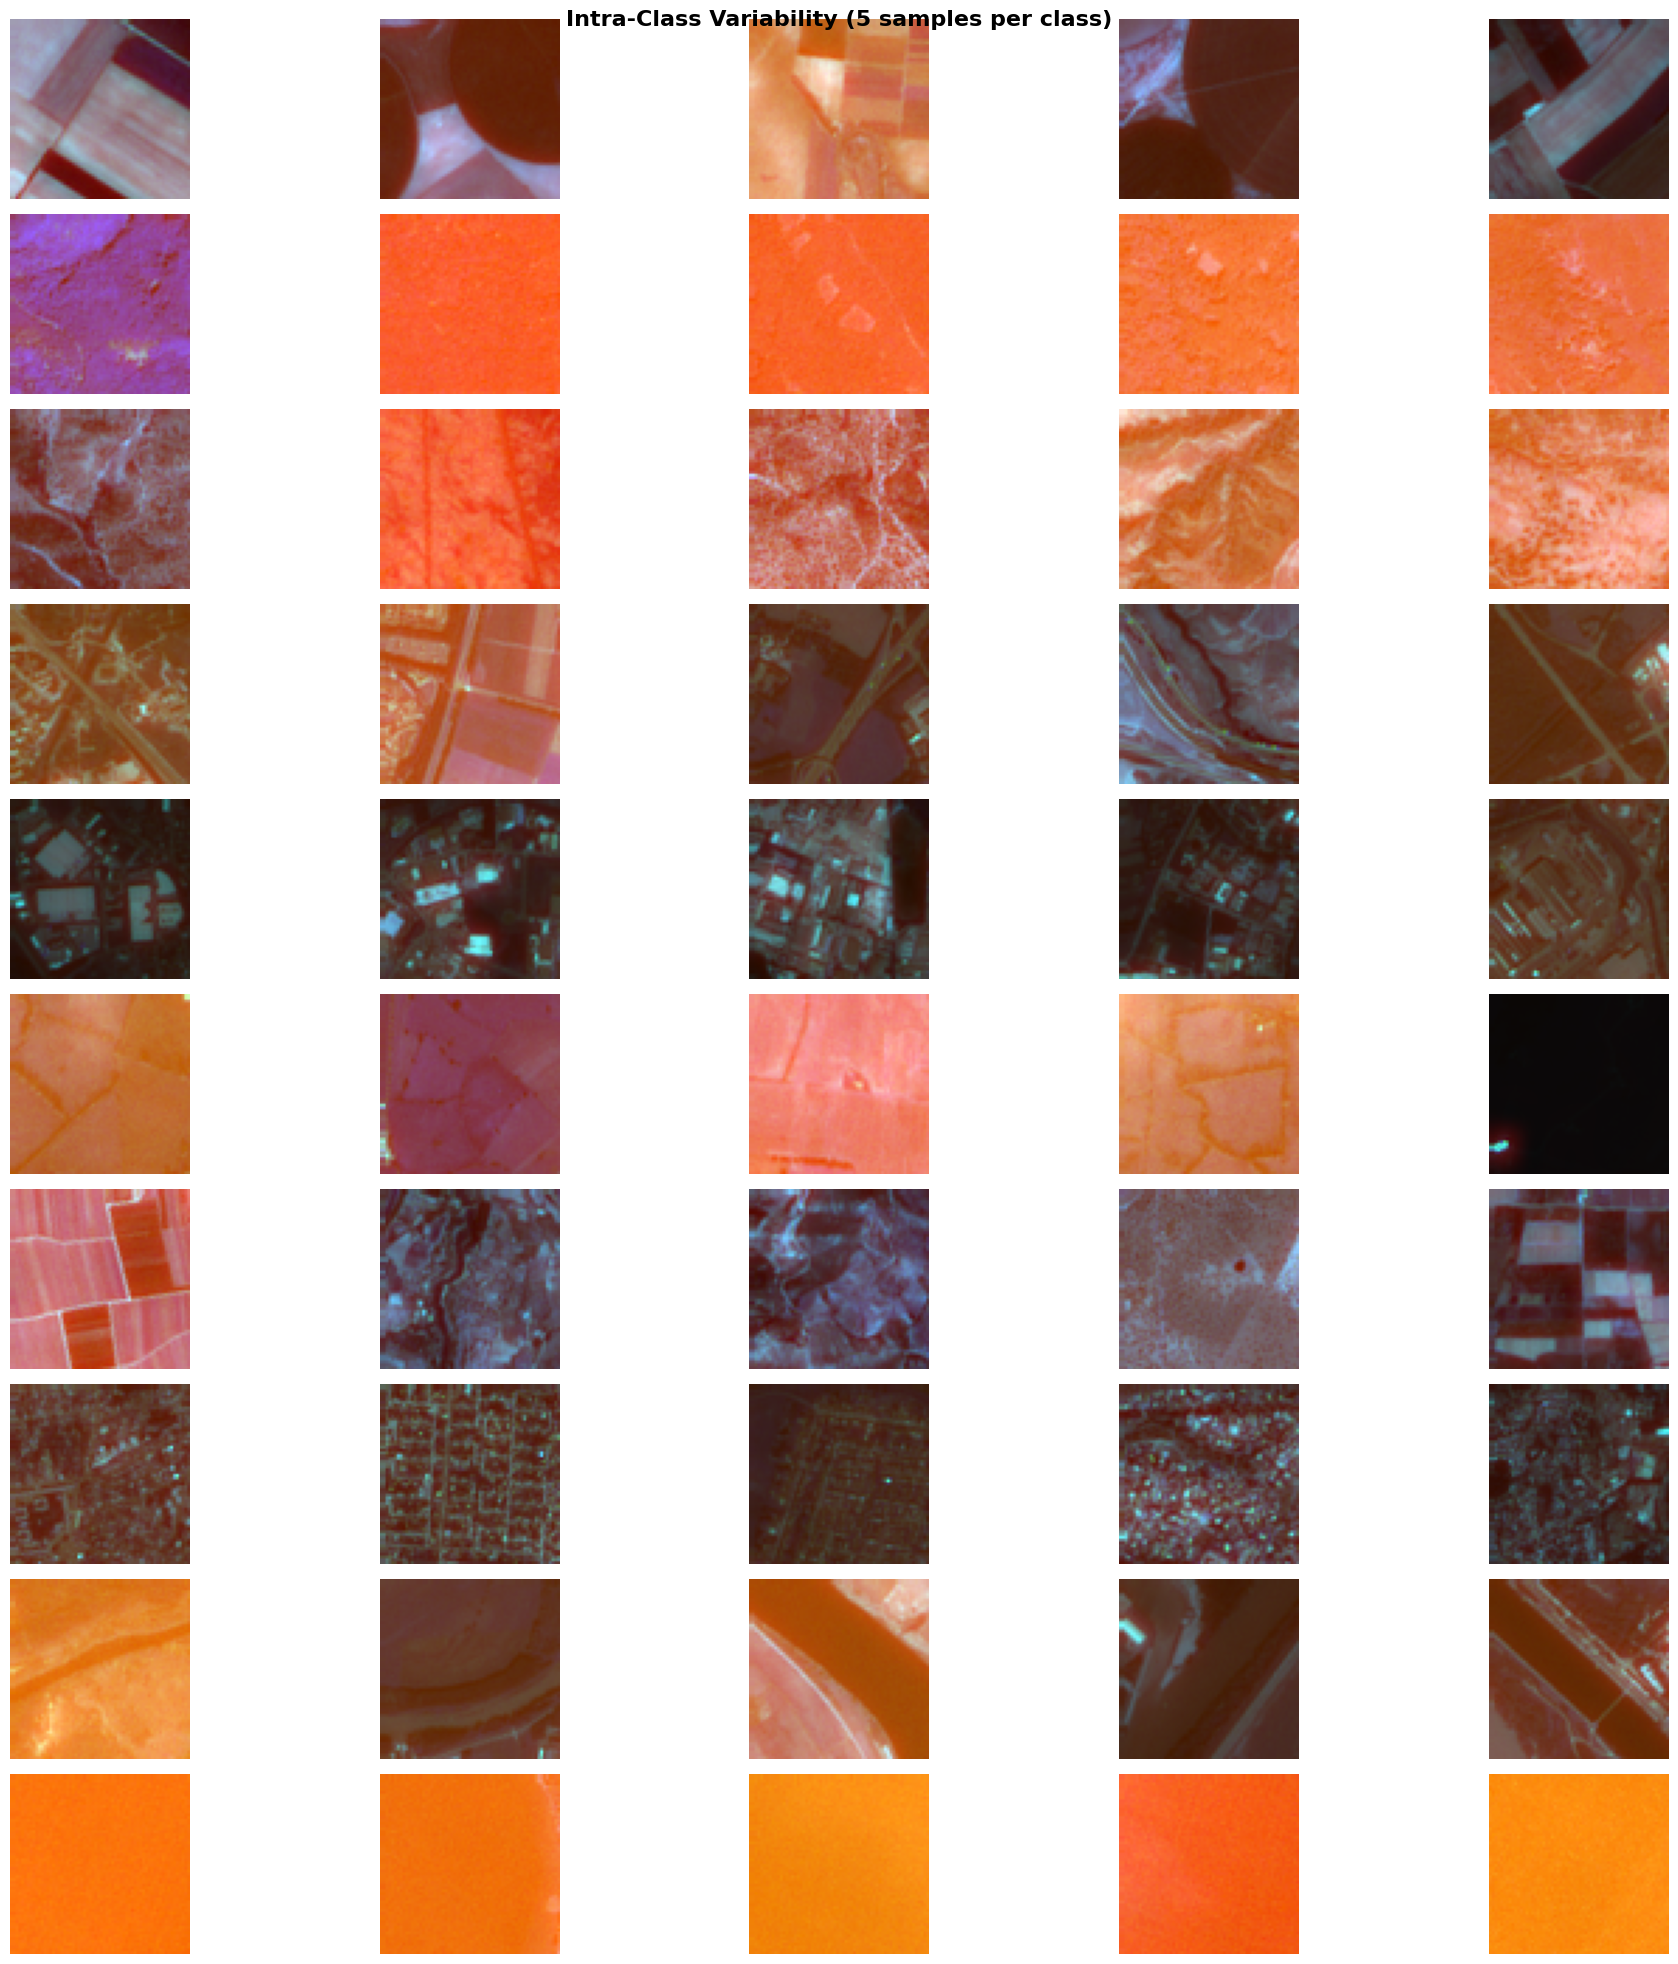


OBSERVATIONS for us to understand more ahuhu:

Look at the visualization and consider:
  • Are images within same class similar?
  • Which classes look very different from each other?
  • Which classes might be confused (similar appearance)?
  • Is there high variability within classes?

 Class-specific analysis complete!


In [30]:
print("\n" + "="*60)
print("2. CLASS-SPECIFIC VISUALIZATION")
print("="*60)

# Analyze variability within each class
print("\nGenerating multiple samples per class to see intra-class variability...\n")

# Create grid: 10 classes × 5 samples each
fig, axes = plt.subplots(len(classes), 5, figsize=(20, 2*len(classes)))

for cls_idx, cls in enumerate(classes):
    cls_path = os.path.join(dataset_analysis_path, cls)
    images = [f for f in os.listdir(cls_path) if f.endswith('.tif')]

    # Sample 5 random images from this class
    sample_size = min(5, len(images))
    sampled_images = np.random.choice(images, sample_size, replace=False)

    for img_idx in range(5):
        if img_idx < len(sampled_images):
            img_path = os.path.join(cls_path, sampled_images[img_idx])

            try:
                with rasterio.open(img_path) as src:
                    # Display first 3 bands as RGB
                    rgb = src.read([1, 2, 3])
                    rgb = np.transpose(rgb, (1, 2, 0))
                    rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

                    axes[cls_idx, img_idx].imshow(rgb_norm)
                    axes[cls_idx, img_idx].axis('off')

                    # Add class name on first image
                    if img_idx == 0:
                        axes[cls_idx, img_idx].set_ylabel(cls, fontsize=10, fontweight='bold', rotation=0, ha='right', va='center')
            except Exception as e:
                axes[cls_idx, img_idx].text(0.5, 0.5, 'Error', ha='center', va='center', fontsize=8)
                axes[cls_idx, img_idx].axis('off')
        else:
            axes[cls_idx, img_idx].axis('off')

plt.suptitle('Intra-Class Variability (5 samples per class)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('class_variability.png', dpi=300, bbox_inches='tight')
print("📊 Saved: class_variability.png")
plt.show()

# Analyze which classes might be confusing
print("\n" + "="*60)
print("OBSERVATIONS for us to understand more ahuhu:")
print("="*60)
print("\nLook at the visualization and consider:")
print("  • Are images within same class similar?")
print("  • Which classes look very different from each other?")
print("  • Which classes might be confused (similar appearance)?")
print("  • Is there high variability within classes?")

print("\n Class-specific analysis complete!")


3. PIXEL VALUE DISTRIBUTION

Analyzing pixel value ranges across dataset...
(Sampling from multiple images and bands)

Total pixels analyzed: 2,662,400

Overall Pixel Statistics:
  Min:    3
  Max:    21150
  Mean:   1419.28
  Median: 1216.00
  Std:    1047.03


/tmp/ipykernel_33202/3387402269.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(band_data_for_box, labels=[f'Band {b}' for b in sample_bands])



📊 Saved: pixel_distribution.png


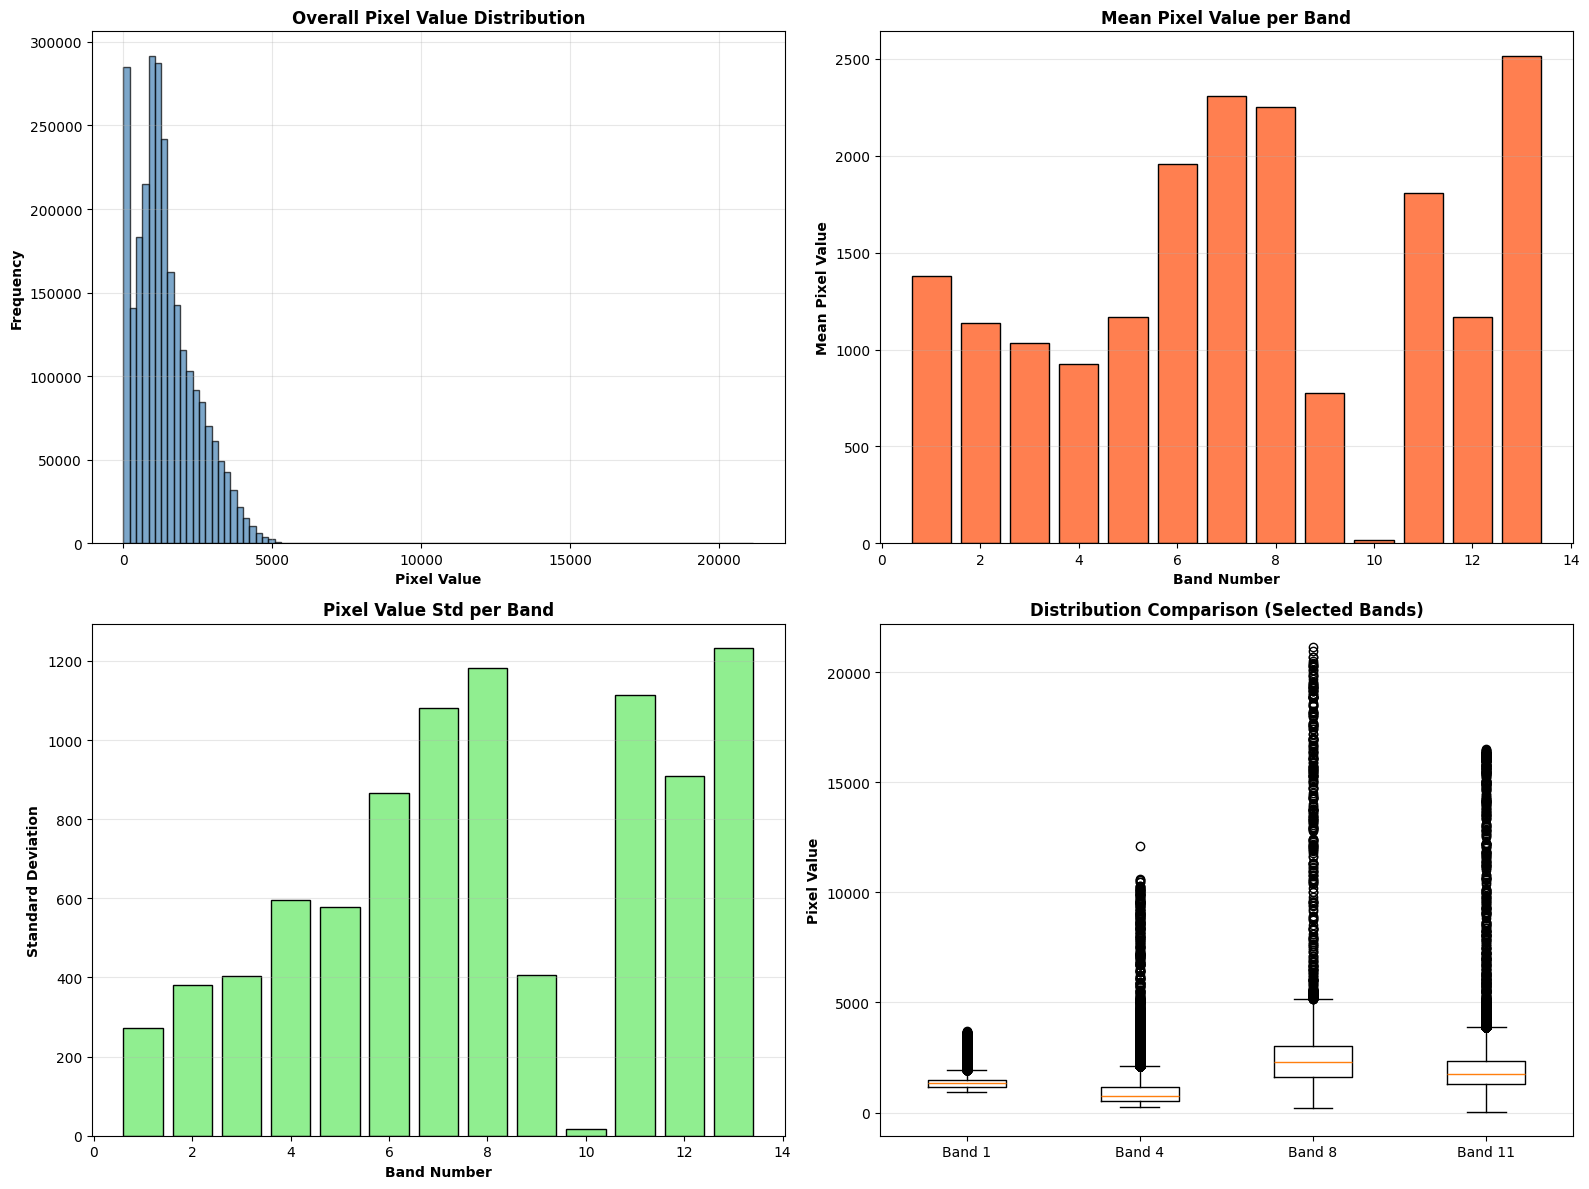


NORMALIZATION RECOMMENDATIONS:

Based on the analysis:
  • Data type: uint16 (range 0-65535)
  • Actual range: 3 - 21150
  • Mean: 1419.28

 Recommended normalization:
   • Divide by 10000 (common for Sentinel-2 data)
   • Or normalize to [0, 1]: (x - min) / (max - min)
   • Or standardize: (x - mean) / std per band

 Pixel distribution analysis complete!


In [31]:
print("\n" + "="*60)
print("3. PIXEL VALUE DISTRIBUTION")
print("="*60)

print("\nAnalyzing pixel value ranges across dataset...")
print("(Sampling from multiple images and bands)")

pixel_values_all = []
pixel_values_per_band = {i: [] for i in range(1, 14)}

# Sample images from each class
n_samples_per_class = 5

for cls in classes:
    cls_path = os.path.join(dataset_analysis_path, cls)
    images = [f for f in os.listdir(cls_path) if f.endswith('.tif')]

    sampled = np.random.choice(images, min(n_samples_per_class, len(images)), replace=False)

    for img_name in sampled:
        img_path = os.path.join(cls_path, img_name)
        try:
            with rasterio.open(img_path) as src:
                # Read all bands
                for band_idx in range(1, 14):
                    band_data = src.read(band_idx)
                    pixel_values_all.extend(band_data.flatten())
                    pixel_values_per_band[band_idx].extend(band_data.flatten())
        except Exception as e:
            print(f" Error reading {img_path}: {e}")

print(f"\nTotal pixels analyzed: {len(pixel_values_all):,}")

# Overall statistics
pixel_values_all = np.array(pixel_values_all)
print(f"\nOverall Pixel Statistics:")
print(f"  Min:    {pixel_values_all.min()}")
print(f"  Max:    {pixel_values_all.max()}")
print(f"  Mean:   {pixel_values_all.mean():.2f}")
print(f"  Median: {np.median(pixel_values_all):.2f}")
print(f"  Std:    {pixel_values_all.std():.2f}")

# Visualize distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall histogram
axes[0, 0].hist(pixel_values_all, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Pixel Value', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Overall Pixel Value Distribution', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Per-band statistics
band_means = []
band_stds = []
for i in range(1, 14):
    band_means.append(np.mean(pixel_values_per_band[i]))
    band_stds.append(np.std(pixel_values_per_band[i]))

axes[0, 1].bar(range(1, 14), band_means, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Band Number', fontweight='bold')
axes[0, 1].set_ylabel('Mean Pixel Value', fontweight='bold')
axes[0, 1].set_title('Mean Pixel Value per Band', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Standard deviation per band
axes[1, 0].bar(range(1, 14), band_stds, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Band Number', fontweight='bold')
axes[1, 0].set_ylabel('Standard Deviation', fontweight='bold')
axes[1, 0].set_title('Pixel Value Std per Band', fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Box plot for a few bands
sample_bands = [1, 4, 8, 11]  # Representative bands
band_data_for_box = [pixel_values_per_band[b] for b in sample_bands]
axes[1, 1].boxplot(band_data_for_box, labels=[f'Band {b}' for b in sample_bands])
axes[1, 1].set_ylabel('Pixel Value', fontweight='bold')
axes[1, 1].set_title('Distribution Comparison (Selected Bands)', fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('pixel_distribution.png', dpi=300, bbox_inches='tight')
print("\n📊 Saved: pixel_distribution.png")
plt.show()

print("\n" + "="*60)
print("NORMALIZATION RECOMMENDATIONS:")
print("="*60)
print("\nBased on the analysis:")
print(f"  • Data type: uint16 (range 0-65535)")
print(f"  • Actual range: {pixel_values_all.min()} - {pixel_values_all.max()}")
print(f"  • Mean: {pixel_values_all.mean():.2f}")
print("\n Recommended normalization:")
print("   • Divide by 10000 (common for Sentinel-2 data)")
print("   • Or normalize to [0, 1]: (x - min) / (max - min)")
print("   • Or standardize: (x - mean) / std per band")

print("\n Pixel distribution analysis complete!")


4. TRAIN/TEST/VALIDATION SPLIT ANALYSIS

Dataset Split Sizes:
  Train:      18900 images (68.5%)
  Validation:  5400 images (19.6%)
  Test:        2700 images (9.8%)
  Total:      27000 images

CLASS DISTRIBUTION PER SPLIT

Train CSV columns: ['Unnamed: 0', 'Filename', 'Label', 'ClassName']

First few rows of train.csv:
   Unnamed: 0                                           Filename  Label  \
0       16257                      AnnualCrop/AnnualCrop_142.jpg      0   
1        3297  HerbaceousVegetation/HerbaceousVegetation_2835...      2   
2       17881               PermanentCrop/PermanentCrop_1073.jpg      6   
3        2223                      Industrial/Industrial_453.jpg      4   
4        4887  HerbaceousVegetation/HerbaceousVegetation_1810...      2   

              ClassName  
0            AnnualCrop  
1  HerbaceousVegetation  
2         PermanentCrop  
3            Industrial  
4  HerbaceousVegetation  

📊 Class distribution across splits:

       Train  Validation  Test  

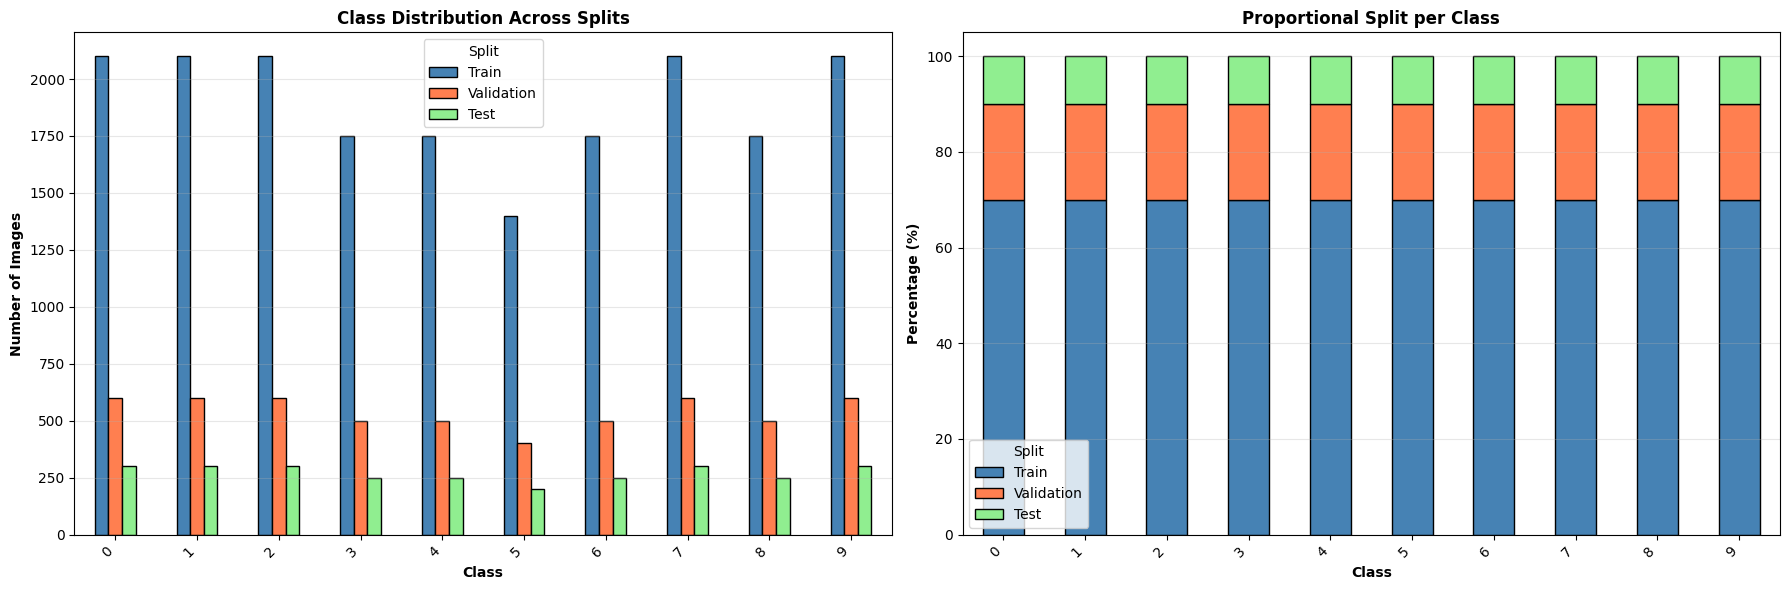


SPLIT BALANCE CHECK:
AnnualCrop               : Train  70.0% | Val  20.0% | Test  10.0%
Forest                   : Train  70.0% | Val  20.0% | Test  10.0%
HerbaceousVegetation     : Train  70.0% | Val  20.0% | Test  10.0%
Highway                  : Train  70.0% | Val  20.0% | Test  10.0%
Industrial               : Train  70.0% | Val  20.0% | Test  10.0%
Pasture                  : Train  70.0% | Val  20.0% | Test  10.0%
PermanentCrop            : Train  70.0% | Val  20.0% | Test  10.0%
Residential              : Train  70.0% | Val  20.0% | Test  10.0%
River                    : Train  70.0% | Val  20.0% | Test  10.0%
SeaLake                  : Train  70.0% | Val  20.0% | Test  10.0%

Overall Split Ratio:      Train 70.0% | Val 20.0% | Test 10.0%

 Split ratios look good!

 Split analysis complete!


In [32]:
print("\n" + "="*60)
print("4. TRAIN/TEST/VALIDATION SPLIT ANALYSIS")
print("="*60)

import pandas as pd

# Load the CSV files
train_df = pd.read_csv('../dataset/train.csv')
val_df = pd.read_csv('../dataset/validation.csv')
test_df = pd.read_csv('../dataset/test.csv')

print(f"\nDataset Split Sizes:")
print(f"  Train:      {len(train_df):5d} images ({len(train_df)/total_images*100:.1f}%)")
print(f"  Validation: {len(val_df):5d} images ({len(val_df)/total_images*100:.1f}%)")
print(f"  Test:       {len(test_df):5d} images ({len(test_df)/total_images*100:.1f}%)")
print(f"  Total:      {len(train_df)+len(val_df)+len(test_df):5d} images")

# Check class distribution in each split
print("\n" + "="*60)
print("CLASS DISTRIBUTION PER SPLIT")
print("="*60)

# Assuming CSV has columns like 'Filename' and 'ClassName' - adjust if needed
# first check what columns exist
print(f"\nTrain CSV columns: {train_df.columns.tolist()}")
print(f"\nFirst few rows of train.csv:")
print(train_df.head())

# Get class column name (adjust based on your CSV structure)
# Common names: 'ClassName', 'Label', 'Class', 'class'
class_column = None
for col in train_df.columns:
    if col.lower() in ['classname', 'label', 'class', 'category']:
        class_column = col
        break

if class_column:
    print(f"\n📊 Class distribution across splits:\n")

    # Create comparison DataFrame
    train_dist = train_df[class_column].value_counts().sort_index()
    val_dist = val_df[class_column].value_counts().sort_index()
    test_dist = test_df[class_column].value_counts().sort_index()

    comparison_df = pd.DataFrame({
        'Train': train_dist,
        'Validation': val_dist,
        'Test': test_dist
    })
    comparison_df['Total'] = comparison_df.sum(axis=1)

    print(comparison_df)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Stacked bar chart
    comparison_df[['Train', 'Validation', 'Test']].plot(
        kind='bar',
        stacked=False,
        ax=axes[0],
        color=['steelblue', 'coral', 'lightgreen'],
        edgecolor='black'
    )
    axes[0].set_xlabel('Class', fontweight='bold')
    axes[0].set_ylabel('Number of Images', fontweight='bold')
    axes[0].set_title('Class Distribution Across Splits', fontweight='bold')
    axes[0].legend(title='Split')
    axes[0].grid(alpha=0.3, axis='y')
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Proportional distribution
    comparison_pct = comparison_df[['Train', 'Validation', 'Test']].div(comparison_df['Total'], axis=0) * 100
    comparison_pct.plot(
        kind='bar',
        stacked=True,
        ax=axes[1],
        color=['steelblue', 'coral', 'lightgreen'],
        edgecolor='black'
    )
    axes[1].set_xlabel('Class', fontweight='bold')
    axes[1].set_ylabel('Percentage (%)', fontweight='bold')
    axes[1].set_title('Proportional Split per Class', fontweight='bold')
    axes[1].legend(title='Split')
    axes[1].grid(alpha=0.3, axis='y')
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig('split_analysis.png', dpi=300, bbox_inches='tight')
    print("\n📊 Saved: split_analysis.png")
    plt.show()

    # Check if splits are balanced
    print("\n" + "="*60)
    print("SPLIT BALANCE CHECK:")
    print("="*60)

    class_names = {i: name for i, name in enumerate(classes)}

    for cls in comparison_df.index:
        cls_name = class_names.get(cls, f"Class_{cls}")
        train_pct = comparison_df.loc[cls, 'Train'] / comparison_df.loc[cls, 'Total'] * 100
        val_pct = comparison_df.loc[cls, 'Validation'] / comparison_df.loc[cls, 'Total'] * 100
        test_pct = comparison_df.loc[cls, 'Test'] / comparison_df.loc[cls, 'Total'] * 100
        print(f"{cls_name:25s}: Train {train_pct:5.1f}% | Val {val_pct:5.1f}% | Test {test_pct:5.1f}%")

    # Overall check
    avg_train_pct = len(train_df) / (len(train_df) + len(val_df) + len(test_df)) * 100
    avg_val_pct = len(val_df) / (len(train_df) + len(val_df) + len(test_df)) * 100
    avg_test_pct = len(test_df) / (len(train_df) + len(val_df) + len(test_df)) * 100

    print(f"\n{'Overall Split Ratio:':25s} Train {avg_train_pct:.1f}% | Val {avg_val_pct:.1f}% | Test {avg_test_pct:.1f}%")

    if 60 <= avg_train_pct <= 80 and 10 <= avg_val_pct <= 20 and 10 <= avg_test_pct <= 20:
        print("\n Split ratios look good!")
    else:
        print("\n  Unusual split ratios detected")

else:
    print("\n  Could not find class column in CSV. Please check CSV structure.")

print("\n Split analysis complete!")


5. CLASS SIMILARITY ANALYSIS

Comparing visually similar classes side-by-side...
📊 Saved: class_similarity.png


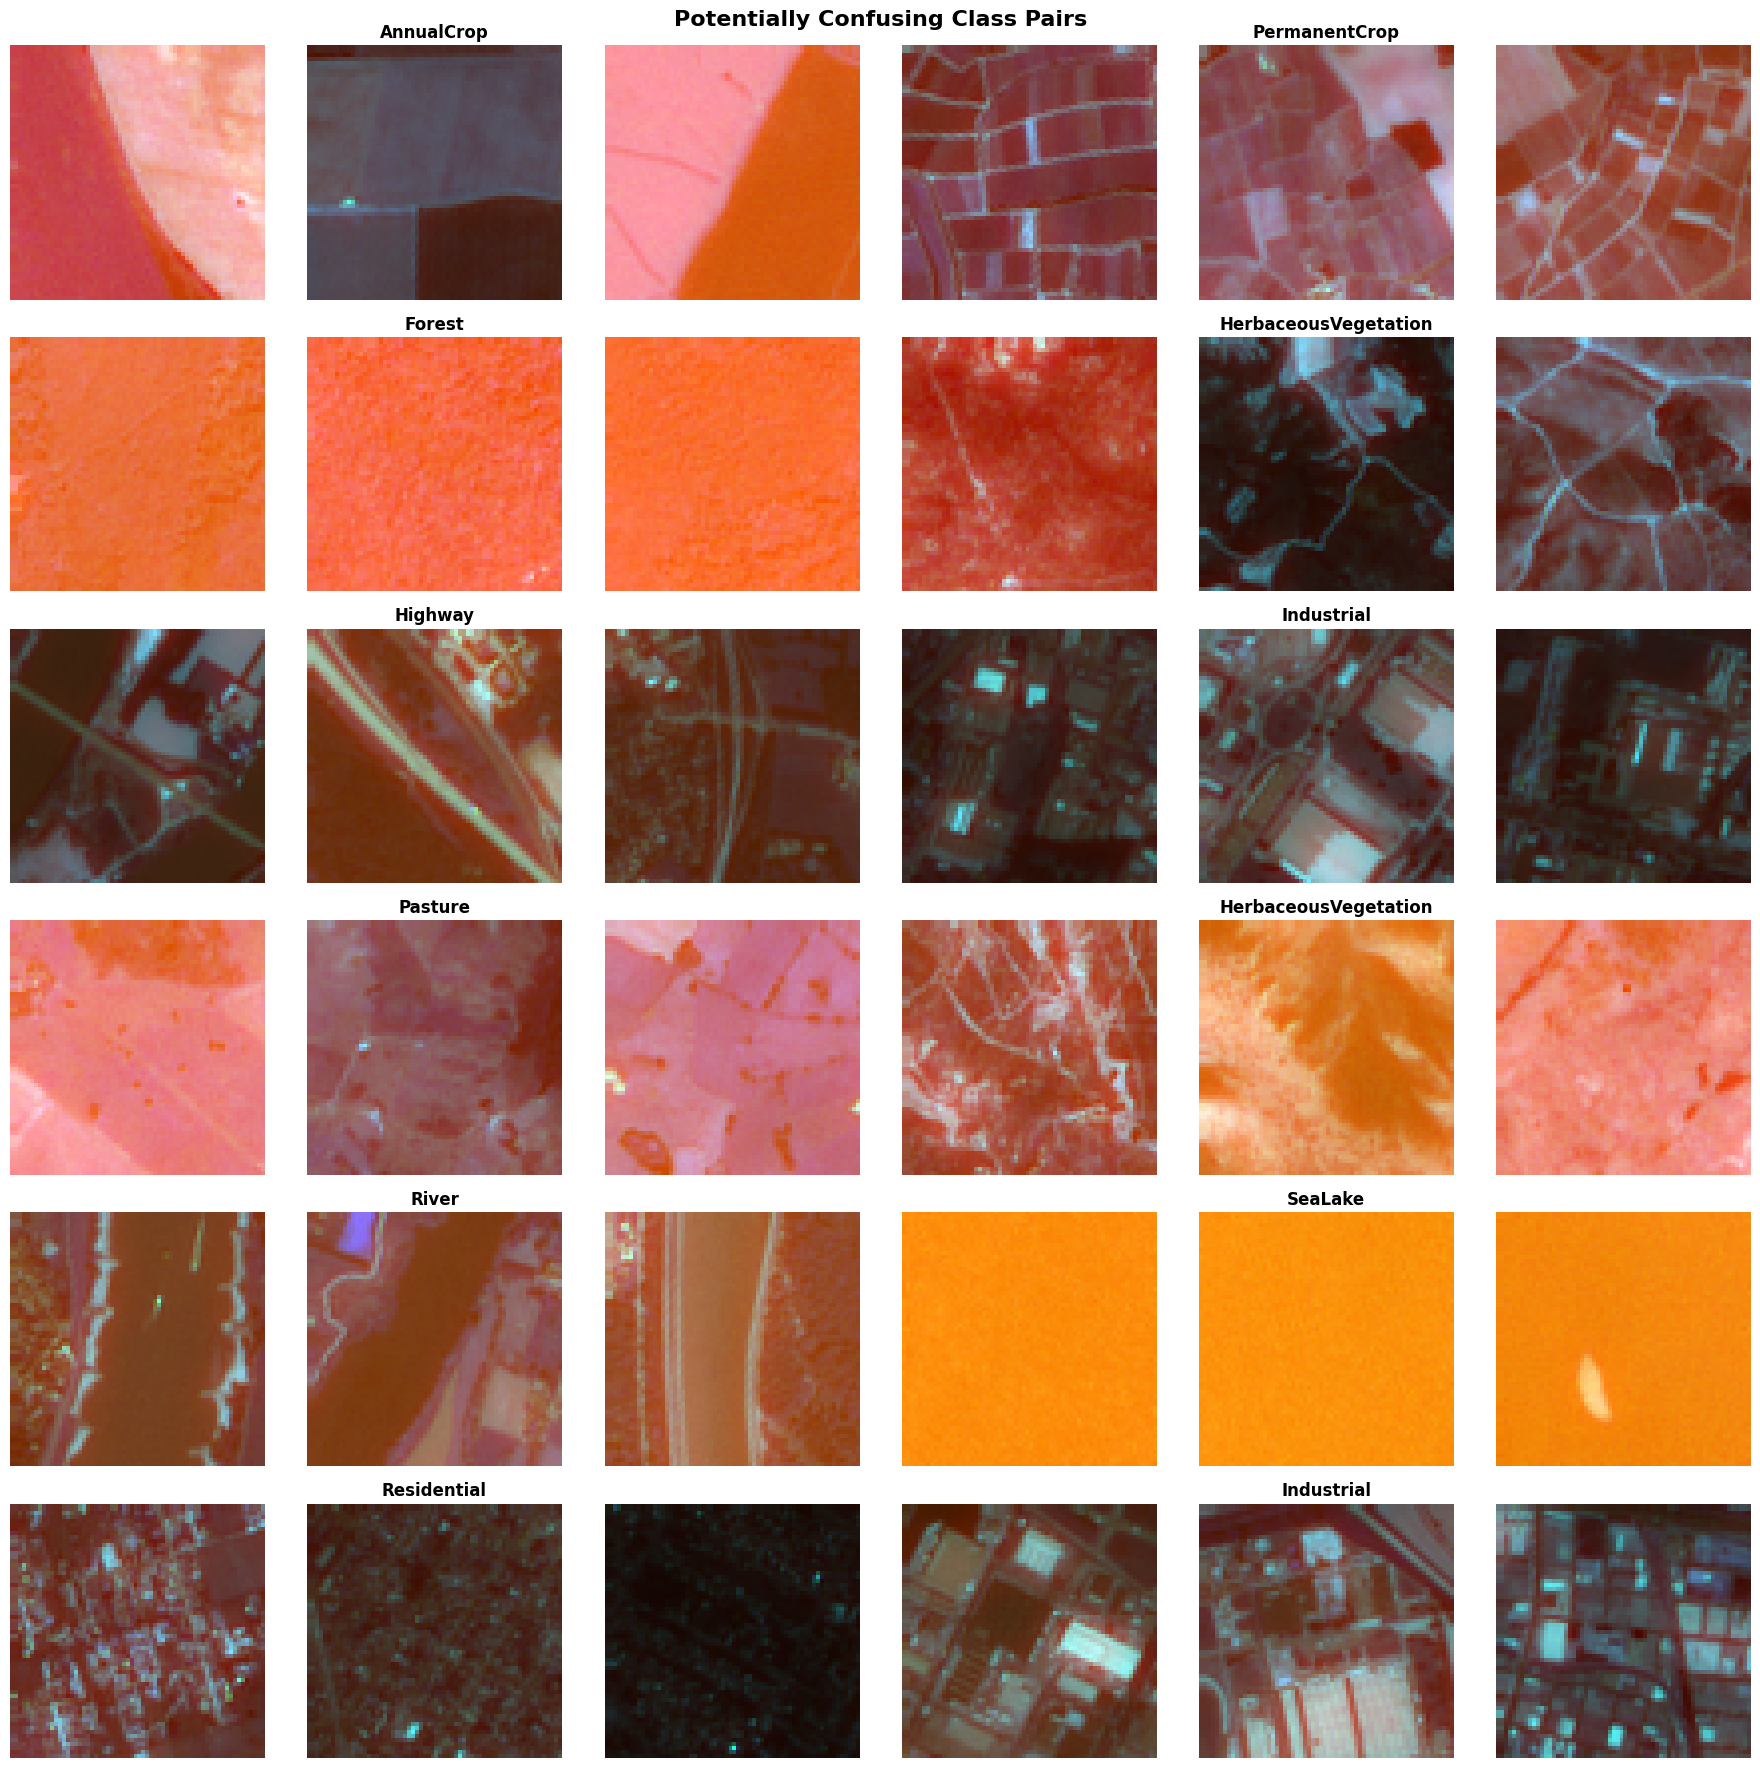


OBSERVATIONS for us to understand:

Look at the pairs above and identify:
  • Which pairs look VERY similar? (high confusion risk)
  • Which pairs are clearly different? (low confusion risk)
  • What features distinguish them? (color, texture, pattern)

 This helps you:
   • Understand potential misclassification patterns
   • Consider if data augmentation might help
   • Decide if certain bands/features are more discriminative

 Class similarity analysis complete!


In [33]:
print("\n" + "="*60)
print("5. CLASS SIMILARITY ANALYSIS")
print("="*60)

print("\nComparing visually similar classes side-by-side...")

# Show pairs of potentially similar classes
similar_pairs = [
    ('AnnualCrop', 'PermanentCrop'),
    ('Forest', 'HerbaceousVegetation'),
    ('Highway', 'Industrial'),
    ('Pasture', 'HerbaceousVegetation'),
    ('River', 'SeaLake'),
    ('Residential', 'Industrial')
]

fig, axes = plt.subplots(len(similar_pairs), 6, figsize=(18, 3*len(similar_pairs)))

for pair_idx, (class1, class2) in enumerate(similar_pairs):
    # Get 3 samples from each class
    cls1_path = os.path.join(dataset_analysis_path, class1)
    cls2_path = os.path.join(dataset_analysis_path, class2)

    imgs1 = [f for f in os.listdir(cls1_path) if f.endswith('.tif')]
    imgs2 = [f for f in os.listdir(cls2_path) if f.endswith('.tif')]

    samples1 = np.random.choice(imgs1, min(3, len(imgs1)), replace=False)
    samples2 = np.random.choice(imgs2, min(3, len(imgs2)), replace=False)

    # Display class 1 samples (first 3 columns)
    for i in range(3):
        img_path = os.path.join(cls1_path, samples1[i])
        try:
            with rasterio.open(img_path) as src:
                rgb = src.read([1, 2, 3])
                rgb = np.transpose(rgb, (1, 2, 0))
                rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())
                axes[pair_idx, i].imshow(rgb_norm)
                axes[pair_idx, i].axis('off')
                if i == 1:
                    axes[pair_idx, i].set_title(class1, fontweight='bold', fontsize=12)
        except:
            axes[pair_idx, i].axis('off')

    # Display class 2 samples (last 3 columns)
    for i in range(3):
        img_path = os.path.join(cls2_path, samples2[i])
        try:
            with rasterio.open(img_path) as src:
                rgb = src.read([1, 2, 3])
                rgb = np.transpose(rgb, (1, 2, 0))
                rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())
                axes[pair_idx, i+3].imshow(rgb_norm)
                axes[pair_idx, i+3].axis('off')
                if i == 1:
                    axes[pair_idx, i+3].set_title(class2, fontweight='bold', fontsize=12)
        except:
            axes[pair_idx, i+3].axis('off')

plt.suptitle('Potentially Confusing Class Pairs', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('class_similarity.png', dpi=300, bbox_inches='tight')
print("📊 Saved: class_similarity.png")
plt.show()

print("\n" + "="*60)
print("OBSERVATIONS for us to understand:")
print("="*60)
print("\nLook at the pairs above and identify:")
print("  • Which pairs look VERY similar? (high confusion risk)")
print("  • Which pairs are clearly different? (low confusion risk)")
print("  • What features distinguish them? (color, texture, pattern)")
print("\n This helps you:")
print("   • Understand potential misclassification patterns")
print("   • Consider if data augmentation might help")
print("   • Decide if certain bands/features are more discriminative")

print("\n Class similarity analysis complete!")


6. DUPLICATE IMAGE DETECTION

Scanning for duplicate images using perceptual hashing...
(This may take a few minutes)

Checking AnnualCrop... (3000 images)

Checking Forest... (3000 images)

Checking HerbaceousVegetation... (3000 images)

Checking Highway... (2500 images)

Checking Industrial... (2500 images)

Checking Pasture... (2000 images)

Checking PermanentCrop... (2500 images)

Checking Residential... (3000 images)

Checking River... (2500 images)

Checking SeaLake... (3597 images)

 Checked 27597 images

DUPLICATE DETECTION RESULTS

  Found 34 groups of potential duplicates:

Duplicate group (hash: 0301c0e0f0f8fcfe):
  • AnnualCrop/AnnualCrop_2420.tif
  • Highway/Highway_958.tif

Duplicate group (hash: 0000000000ffffff):
  • AnnualCrop/AnnualCrop_1133.tif
  • AnnualCrop/AnnualCrop_2824.tif
  • HerbaceousVegetation/HerbaceousVegetation_1291.tif
  • SeaLake/SeaLake_2163.tif

Duplicate group (hash: 0f0f1f1f0f0f0000):
  • AnnualCrop/AnnualCrop_2422.tif
  • SeaLake/SeaLake_350.tif


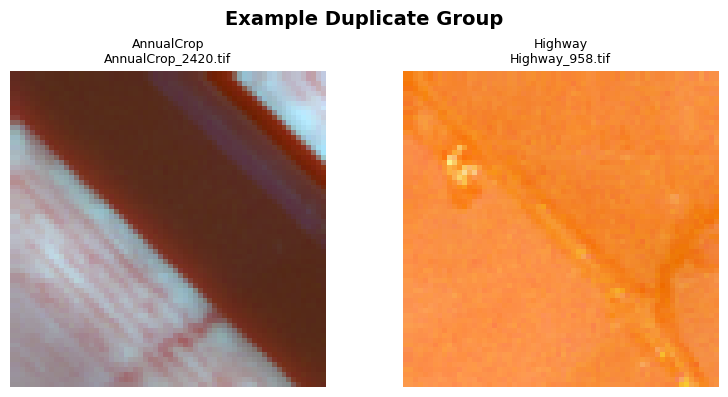


NEAR-DUPLICATE DETECTION

Checking for near-duplicates (similar but not identical)...
Large dataset - sampling 1000 images for near-duplicate check

  Found 41 pairs of near-duplicates
(Images that are very similar but not identical)

RECOMMENDATIONS:

  Duplicates/near-duplicates detected:
   • May cause data leakage between train/val/test
   • Consider removing duplicates
   • Check if they're in different splits

 Duplicate detection complete!


In [34]:
print("\n" + "="*60)
print("6. DUPLICATE IMAGE DETECTION")
print("="*60)

from collections import defaultdict
import imagehash
from PIL import Image

print("\nScanning for duplicate images using perceptual hashing...")
print("(This may take a few minutes)")

# Dictionary to store hashes
hashes = defaultdict(list)
total_checked = 0

for cls in classes:
    cls_path = os.path.join(dataset_analysis_path, cls)
    images = [f for f in os.listdir(cls_path) if f.endswith('.tif')]

    print(f"\nChecking {cls}... ({len(images)} images)")

    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        try:
            with rasterio.open(img_path) as src:
                # Read first 3 bands and convert to PIL Image for hashing
                rgb = src.read([1, 2, 3])
                rgb = np.transpose(rgb, (1, 2, 0))
                # Normalize to 0-255 for PIL
                rgb_norm = ((rgb - rgb.min()) / (rgb.max() - rgb.min()) * 255).astype(np.uint8)
                pil_img = Image.fromarray(rgb_norm)

                # Compute hash (average hash is fast and effective)
                img_hash = imagehash.average_hash(pil_img, hash_size=8)

                # Store hash with file info
                hashes[str(img_hash)].append({
                    'path': img_path,
                    'class': cls,
                    'filename': img_name
                })
                total_checked += 1
        except Exception as e:
            pass

print(f"\n Checked {total_checked} images")

# Find duplicates (same hash)
print("\n" + "="*60)
print("DUPLICATE DETECTION RESULTS")
print("="*60)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

if duplicates:
    print(f"\n  Found {len(duplicates)} groups of potential duplicates:")

    duplicate_count = 0
    for hash_val, files in list(duplicates.items())[:10]:  # Show first 10 groups
        duplicate_count += len(files) - 1
        print(f"\nDuplicate group (hash: {hash_val}):")
        for f in files:
            print(f"  • {f['class']}/{f['filename']}")

    if len(duplicates) > 10:
        print(f"\n... and {len(duplicates) - 10} more duplicate groups")

    print(f"\nTotal duplicate images: ~{sum(len(files)-1 for files in duplicates.values())}")

    # Visualize some duplicates
    print("\nVisualizing first duplicate group...")

    first_group = list(duplicates.values())[0]
    n_show = min(4, len(first_group))

    fig, axes = plt.subplots(1, n_show, figsize=(4*n_show, 4))
    if n_show == 1:
        axes = [axes]

    for idx, file_info in enumerate(first_group[:n_show]):
        try:
            with rasterio.open(file_info['path']) as src:
                rgb = src.read([1, 2, 3])
                rgb = np.transpose(rgb, (1, 2, 0))
                rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

                axes[idx].imshow(rgb_norm)
                axes[idx].set_title(f"{file_info['class']}\n{file_info['filename']}", fontsize=9)
                axes[idx].axis('off')
        except:
            axes[idx].axis('off')

    plt.suptitle('Example Duplicate Group', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('duplicates.png', dpi=300, bbox_inches='tight')
    print("📊 Saved: duplicates.png")
    plt.show()

else:
    print("\n No exact duplicates found!")

# Check for near-duplicates (Hamming distance <= 5)
print("\n" + "="*60)
print("NEAR-DUPLICATE DETECTION")
print("="*60)

print("\nChecking for near-duplicates (similar but not identical)...")

hash_list = list(hashes.keys())
near_duplicates = []

# Compare hashes (only sample if too many)
if len(hash_list) > 1000:
    print("Large dataset - sampling 1000 images for near-duplicate check")
    hash_list = np.random.choice(hash_list, 1000, replace=False)

for i in range(len(hash_list)):
    for j in range(i+1, len(hash_list)):
        hash1 = imagehash.hex_to_hash(hash_list[i])
        hash2 = imagehash.hex_to_hash(hash_list[j])

        # Hamming distance
        distance = hash1 - hash2

        if distance <= 5:  # Very similar
            near_duplicates.append({
                'distance': distance,
                'files1': hashes[hash_list[i]],
                'files2': hashes[hash_list[j]]
            })

if near_duplicates:
    print(f"\n  Found {len(near_duplicates)} pairs of near-duplicates")
    print("(Images that are very similar but not identical)")
else:
    print("\n No near-duplicates found!")

print("\n" + "="*60)
print("RECOMMENDATIONS:")
print("="*60)
if duplicates or near_duplicates:
    print("\n  Duplicates/near-duplicates detected:")
    print("   • May cause data leakage between train/val/test")
    print("   • Consider removing duplicates")
    print("   • Check if they're in different splits")
else:
    print("\n No duplicates found - dataset quality is good!")

print("\n Duplicate detection complete!")

In [35]:
# ============================================
# STEP 9: CHALLENGES & RECOMMENDATIONS
# ============================================
print("\n" + "="*60)
print("IDENTIFIED CHALLENGES & RECOMMENDATIONS")
print("="*60)

challenges = []

# Challenge 1: Class imbalance
if balance_ratio < 0.8:
    challenges.append("Class Imbalance")
    print(" CHALLENGE 1: Class Imbalance")
    print(f"   Balance ratio: {balance_ratio:.3f}")
    print("    Solutions:")
    print("      • Use WeightedRandomSampler in DataLoader")
    print("      • Apply class weights in loss function")
    print("      • More augmentation for minority classes")

# Challenge 2: Varying dimensions (only if images were loaded)
if len(image_sizes) > 0:
    unique_sizes = list(set(image_sizes))
    if len(unique_sizes) > 1:
        challenges.append("Varying Dimensions")
        print(" CHALLENGE 2: Varying Image Dimensions")
        print("    Solutions:")
        print("      • Add transforms.Resize(224) or (256)")
        print("      • Use transforms.CenterCrop(224)")

# Challenge 3: Mixed color modes (only if images were loaded)
if len(image_sizes) > 0:
    mode_counts = Counter(image_modes)
    if len(mode_counts) > 1:
        challenges.append("Mixed Color Modes")
        print(" CHALLENGE 3: Mixed Color Modes")
        print("    Solutions:")
        print("      • Convert to RGB: img.convert('RGB')")

# Challenge 4: TIFF handling (only if images were loaded)
if len(image_sizes) > 0:
    format_counts = Counter(file_formats)
    if 'TIFF' in format_counts:
        challenges.append("Multi-band TIFF files")
        print("\n  NOTE: Multi-band TIFF files detected (13 bands)")
        print("   • Use rasterio library to load images")
        print("   • Select appropriate bands for RGB visualization")
        print("   • Consider using all bands for training")

if not challenges:
    print("\n No major challenges!")
    print("   Dataset is well-structured")


IDENTIFIED CHALLENGES & RECOMMENDATIONS
 CHALLENGE 1: Class Imbalance
   Balance ratio: 0.556
    Solutions:
      • Use WeightedRandomSampler in DataLoader
      • Apply class weights in loss function
      • More augmentation for minority classes

  NOTE: Multi-band TIFF files detected (13 bands)
   • Use rasterio library to load images
   • Select appropriate bands for RGB visualization
   • Consider using all bands for training


In [36]:
# ============================================
# STEP 10: FINAL SUMMARY
# ============================================
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

# Recalculate if needed
if len(image_sizes) > 0:
    unique_sizes = list(set(image_sizes))
    mode_counts = Counter(image_modes)
    format_counts = Counter(file_formats)
    modes_str = ', '.join(mode_counts.keys())
    formats_str = ', '.join(format_counts.keys())
else:
    unique_sizes = []
    modes_str = "N/A"
    formats_str = "N/A"

print(f"""
📊 Dataset: allBands
   • Classes: {len(classes)}
   • Total Images: {total_images:,}
   • Avg per Class: {avg_images:.1f}
   • Balance Ratio: {balance_ratio:.3f}

📐 Image Properties:
   • Unique Dimensions: {len(unique_sizes)}
   • Color Modes: {modes_str}
   • File Formats: {formats_str}

 Recommended Preprocessing:
   1. Use rasterio to load multi-band TIFF files
   2. Select RGB bands (or use all 13 bands for training)
   3. Resize to 224×224 (or 256×256)
   4. Normalize appropriately for satellite imagery
   5. Apply data augmentation
   {'6. Use weighted sampling for imbalance' if balance_ratio < 0.8 else ''}

📁 Output Files Generated:
   • class_distribution.png
   • sample_images.png
""")

print("="*60)
print(" Analysis Complete!")
print("="*60)


FINAL SUMMARY

📊 Dataset: allBands
   • Classes: 10
   • Total Images: 27,597
   • Avg per Class: 2759.7
   • Balance Ratio: 0.556

📐 Image Properties:
   • Unique Dimensions: 1
   • Color Modes: 13-band
   • File Formats: TIFF

 Recommended Preprocessing:
   1. Use rasterio to load multi-band TIFF files
   2. Select RGB bands (or use all 13 bands for training)
   3. Resize to 224×224 (or 256×256)
   4. Normalize appropriately for satellite imagery
   5. Apply data augmentation
   6. Use weighted sampling for imbalance

📁 Output Files Generated:
   • class_distribution.png
   • sample_images.png

 Analysis Complete!
